In [1]:
!pip install bs4

##hello

In [3]:
from bs4 import BeautifulSoup


with open('index2.html','r') as file:
    html_content =file.read()

soup = BeautifulSoup(html_content,'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   2020 Oscar nominees and winners
  </title>
 </head>
 <body>
  <h1>
   Oscars 2020
  </h1>
  <p>
   The biggest cinema awards ceremony took place in February. This year's highlights were:
  </p>
  <ul class="highlights">
   <li>
    Joker
   </li>
   <li>
    1917
   </li>
   <li>
    Once Upon a Time in Hollywood
   </li>
   <li>
    The Irishman
   </li>
  </ul>
  <p>
   See the winners of 3 categories below.
  </p>
  <div>
   <div class="best-film-category">
    <h2>
     Category: best film
    </h2>
    <ul>
     <li>
      Ford vs Ferrari
     </li>
     <li>
      The Irishman
     </li>
     <li>
      JoJo Rabbit
     </li>
     <li>
      Joker
     </li>
     <li>
      Little Women
     </li>
     <li>
      Marriage Story
     </li>
     <li>
      1917
     </li>
     <li>
      Once Upon a Time in Hollywood
     </li>
     <li class="winner">
      Parasite
      <strong>
       [WINNER]
      </strong>
     </li>
    </ul>
   </div>
   <br/>
 

In [5]:
print(soup.title)

<title>2020 Oscar nominees and winners</title>


In [6]:
soup.title.get_text()

'2020 Oscar nominees and winners'

In [7]:
soup.h1.get_text()

'Oscars 2020'

In [15]:
soup.find('li')

<li>Joker</li>

In [ ]:
soup.find_all('input')

[<input id="username" name="username" type="text"/>,
 <input id="password" name="password" type="password"/>,
 <input type="submit" value="Submit"/>]

In [ ]:
soup.find_all('input', {"name":'password'})

[<input id="password" name="password" type="password"/>]

In [31]:
html_string ="""<html>
     <head>
         <title>2020 Oscar nominees and winners</title>
     </head>
     <body>
         <h1>Oscars 2020</h1>
         <p>The biggest cinema awards ceremony took place in February. This year's highlights were:</p>
         <ul class="highlights">
             <li>Joker</li>
             <li>1917</li>
             <li>Once Upon a Time in Hollywood</li>
             <li>The Irishman</li>
         </ul>
         <p>See the winners of 3 categories below.</p>
         <div>
             <div class="best-film-category">
                 <h2>Category: best film</h2>
                 <ul>
                     <li>Ford vs Ferrari</li>
                     <li>The Irishman</li>
                     <li>JoJo Rabbit</li>
                     <li>Joker</li>
                     <li>Little Women</li>
                     <li>Marriage Story</li>
                     <li>1917</li>
                     <li>Once Upon a Time in Hollywood</li>
                     <li class="winner">Parasite <strong>[WINNER]</strong></li>
                 </ul>
             </div>
             <br>
             <div class="best-actress-category">
                 <h2>Category: best actor</h2>
                 <ul>
                     <li>Antonio Banderas - Pain and Glory</li>
                     <li>Leonardo DiCaprio - Once Upon a Time In... Hollywood</li>
                     <li>Adam Driver - Marriage Story</li>
                     <li class="winner">Joaquin Phoenix - Joker <strong>[WINNER]</strong></li>
                     <li>Jonathan Price - The Two Popes</li>
                 </ul>
             </div>
             <br>
             <div class="best-actress-category" name="best">
                 <h2>Category: best actress</h2>
                 <ul>
                     <li>Cythia Erivo - Harriet</li>
                     <li>Scarlett Johansson - Marriage Story</li>
                     <li>Saoirse Ronan - Little Women</li>
                     <li>Charlize Theron - The Scandal</li>
                     <li class="winner">Renée Zellweger - Judy: Far Over the Rainbow <strong>[WINNER]</strong></li>
                 </ul>
             </div>
         </div>
     </body>
</html>"""

soup = BeautifulSoup(html_string,'html.parser')

best_film_winner = soup.find('div', class_='best-film-category').find('li')
print(f"Best Film Winner: {best_film_winner.get_text()}")

best = soup.find('div', {"class":"best-actress-category","name":"best"}).find('h2')
print(f"best:{best.get_text()}")
winner_parent = best_film_winner.find_next_sibling()
print(f"Winner's Parent Tag: {winner_parent.get_text()}")



Best Film Winner: Ford vs Ferrari
best:Category: best actress
Winner's Parent Tag: The Irishman


In [ ]:
winner_parent = winner_parent.parent
next_category = winner_parent.find_next_sibling('div')
previous_category = winner_parent.find_previous_sibling('div')
print(f"Next Category: {next_category.h2.get_text() if next_category else 'None'}")
print(f"Previous Category: {previous_category.h2.get_text() if previous_category else 'None'}")

Next Category: Category: best actor
Previous Category: None


In [32]:
from urllib.request import urlopen
url = 'https://www.bbc.com/news'
response = urlopen(url)
html_ocean_ws = response.read()
html_ocean_ws
soup_ocean_ws = BeautifulSoup(html_ocean_ws, 'html.parser')
print(soup_ocean_ws.prettify())

<!DOCTYPE html>
<html lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   Home - BBC News
  </title>
  <meta content="Home - BBC News" property="og:title"/>
  <meta content="Home - BBC News" name="twitter:title"/>
  <meta content="Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides trusted World and UK news as well as local and regional perspectives. Also entertainment, business, science, technology and health news." name="description"/>
  <meta content="Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides trusted World and UK news as well as local and regional perspectives. Also entertainment, business, science, technology and health news." property="og:description"/>
  <meta content="Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides trusted World and U

In [37]:
soup_ocean_ws.find_all("a")[7].get("href")

'/innovation'

In [43]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bbc.com/news'
response = requests.get(url)
html_ocean_ws = response.text
soup_ocean_ws = BeautifulSoup(html_ocean_ws, 'html.parser')
soup_ocean_ws.prettify()


'<!DOCTYPE html>\n<html lang="en-GB">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width" name="viewport"/>\n  <title>\n   Home - BBC News\n  </title>\n  <meta content="Home - BBC News" property="og:title"/>\n  <meta content="Home - BBC News" name="twitter:title"/>\n  <meta content="Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides trusted World and UK news as well as local and regional perspectives. Also entertainment, business, science, technology and health news." name="description"/>\n  <meta content="Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides trusted World and UK news as well as local and regional perspectives. Also entertainment, business, science, technology and health news." property="og:description"/>\n  <meta content="Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides truste

In [ ]:
import requests
response = requests.get("https://www.scrapethissite.com/pages/simple/")
print(response.text)
websoup = BeautifulSoup(response.text, 'html.parser')

<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png" />

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="description" content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping.">

    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">
    <link href='https://fonts.googleapis.com/css?family=Lato:400,700' rel='stylesheet' type='text/css'>
    <link rel="stylesheet" type="text/css" href="/static/css/styles.css">

    
<meta name=

In [ ]:
countries = websoup.find_all(class_="country-name")

In [ ]:
countries = [country.get_text().strip() for country in countries]

In [ ]:
countries[:5]

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla']

In [ ]:
capitals = websoup.find_all(class_="country-capital")
capitals = [capital.get_text().strip() for capital in capitals]
capitals[:5]

['Andorra la Vella', 'Abu Dhabi', 'Kabul', "St. John's", 'The Valley']

In [ ]:
populations = websoup.find_all(class_="country-population")
populations  = [population.get_text().strip() for population in populations]
populations[:5]

['84000', '4975593', '29121286', '86754', '13254']

In [ ]:
areas = websoup.find_all(class_="country-area")
areas = [area.get_text().strip() for area in areas]

In [ ]:
import pandas as pd
data = pd.DataFrame({
    "Country": countries,
    "Capital": capitals,
    "Population": populations,
    "Area": areas
})

In [ ]:
data.head()

,Country,Capital,Population,Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

html = '''
<html>
  <body>
    <div class="product">
      <h2 class="title">Product 1</h2>
      <span class="price">$29.99</span>
    </div>
    <div class="product">
      <h2 class="title">Product 2</h2>
      <span class="price">$49.99</span>
    </div>
    <div class="product">
      <h2 class="title">Product 3</h2>
      <span class="price">$19.99</span>
    </div>
  </body>
</html>
'''

soup = BeautifulSoup(html, 'html.parser')
products = soup.find_all('div', class_='product')

data = []
for product in products:
    title = product.find('h2', class_='title').text
    price = float(product.find('span', class_='price').text.replace('$', ''))
    data.append({'Title': title, 'Price': price})

df = pd.DataFrame(data)
print(df)

# Analyzing the data
average_price = df['Price'].mean()
most_expensive = df.loc[df['Price'].idxmax()]

print(f"Average Price: ${average_price:.2f}")
print(f"Most Expensive Product: {most_expensive['Title']} at ${most_expensive['Price']:.2f}")


       Title  Price
0  Product 1  29.99
1  Product 2  49.99
2  Product 3  19.99
Average Price: $33.32
Most Expensive Product: Product 2 at $49.99


In [ ]:
html = '''
<html>
  <body>
    <div class="job">
      <h2 class="title">Software Engineer</h2>
      <span class="salary">$100,000</span>
    </div>
    <div class="job">
      <h2 class="title">Data Scientist</h2>
      <span class="salary">$120,000</span>
    </div>
    <div class="job">
      <h2 class="title">Software Engineer</h2>
      <span class="salary">$105,000</span>
    </div>
  </body>
</html>
'''

soup = BeautifulSoup(html, 'html.parser')
jobs = soup.find_all('div', class_='job')

data = []
for job in jobs:
    title = job.find('h2', class_='title').text
    salary = int(job.find('span', class_='salary').text.replace('$', '').replace(',', ''))
    data.append({'Title': title, 'Salary': salary})

df = pd.DataFrame(data)
print(df)

# Analyzing the data
common_title = df['Title'].mode()[0]
average_salary = df['Salary'].mean()

print(f"Most Common Job Title: {common_title}")
print(f"Average Salary: ${average_salary:.2f}")


               Title  Salary
0  Software Engineer  100000
1     Data Scientist  120000
2  Software Engineer  105000
Most Common Job Title: Software Engineer
Average Salary: $108333.33


In [ ]:
html = '''
<html>
  <body>
    <div class="blog-post">
      <h2 class="title">Post 1</h2>
      <span class="date">2024-01-15</span>
      <span class="author">Alice</span>
    </div>
    <div class="blog-post">
      <h2 class="title">Post 2</h2>
      <span class="date">2024-02-20</span>
      <span class="author">Bob</span>
    </div>
    <div class="blog-post">
      <h2 class="title">Post 3</h2>
      <span class="date">2024-01-25</span>
      <span class="author">Alice</span>
    </div>
  </body>
</html>
'''

soup = BeautifulSoup(html, 'html.parser')
posts = soup.find_all('div', class_='blog-post')

data = []
for post in posts:
    title = post.find('h2', class_='title').text
    date = post.find('span', class_='date').text
    author = post.find('span', class_='author').text
    data.append({'Title': title, 'Date': date, 'Author': author})

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

print(df)

# Analyzing the data
prolific_author = df['Author'].mode()[0]
posts_per_month = df['Month'].value_counts().sort_index()

print(f"Most Prolific Author: {prolific_author}")
print("Posts Per Month:")
print(posts_per_month)


    Title       Date Author  Month
0  Post 1 2024-01-15  Alice      1
1  Post 2 2024-02-20    Bob      2
2  Post 3 2024-01-25  Alice      1
Most Prolific Author: Alice
Posts Per Month:
Month
1    2
2    1
Name: count, dtype: int64


In [ ]:
html = '''
<html>
  <body>
    <div class="movie">
      <h2 class="title">Movie 1</h2>
      <span class="rating">8.2</span>
    </div>
    <div class="movie">
      <h2 class="title">Movie 2</h2>
      <span class="rating">7.5</span>
    </div>
    <div class="movie">
      <h2 class="title">Movie 3</h2>
      <span class="rating">8.8</span>
    </div>
  </body>
</html>
'''

soup = BeautifulSoup(html, 'html.parser')
movies = soup.find_all('div', class_='movie')

data = []
for movie in movies:
    title = movie.find('h2', class_='title').text
    rating = float(movie.find('span', class_='rating').text)
    data.append({'Title': title, 'Rating': rating})

df = pd.DataFrame(data)
print(df)

# Analyzing the data
highest_rated = df.loc[df['Rating'].idxmax()]
average_rating = df['Rating'].mean()

print(f"Highest Rated Movie: {highest_rated['Title']} with a rating of {highest_rated['Rating']}")
print(f"Average Rating: {average_rating:.2f}")


     Title  Rating
0  Movie 1     8.2
1  Movie 2     7.5
2  Movie 3     8.8
Highest Rated Movie: Movie 3 with a rating of 8.8
Average Rating: 8.17


In [ ]:
html = '''
<html>
  <body>
    <div class="news-article">
      <h2 class="title">Breaking News: Market Crash</h2>
      <p class="summary">The stock market experienced a significant crash today.</p>
      <span class="date">2024-07-01</span>
    </div>
    <div class="news-article">
      <h2 class="title">Sports Update: Local Team Wins</h2>
      <p class="summary">The local team won their championship game last night.</p>
      <span class="date">2024-07-01</span>
    </div>
    <div class="news-article">
      <h2 class="title">Weather Alert: Storm Incoming</h2>
      <p class="summary">A major storm is expected to hit the coast this weekend.</p>
      <span class="date">2024-07-02</span>
    </div>
  </body>
</html>
'''

soup = BeautifulSoup(html, 'html.parser')
articles = soup.find_all('div', class_='news-article')

data = []
for article in articles:
    title = article.find('h2', class_='title').text
    summary = article.find('p', class_='summary').text
    date = article.find('span', class_='date').text
    data.append({'Title': title, 'Summary': summary, 'Date': date})

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

print(df)

# Analyzing the data
articles_per_day = df['Date'].value_counts().sort_index()

from collections import Counter
words = ' '.join(df['Title']).split()
most_common_words = Counter(words).most_common(5)

print("Articles Per Day:")
print(articles_per_day)
print("Most Common Words in Titles:")
print(most_common_words)


                            Title  \
0     Breaking News: Market Crash   
1  Sports Update: Local Team Wins   
2   Weather Alert: Storm Incoming   

                                             Summary       Date  
0  The stock market experienced a significant cra... 2024-07-01  
1  The local team won their championship game las... 2024-07-01  
2  A major storm is expected to hit the coast thi... 2024-07-02  
Articles Per Day:
Date
2024-07-01    2
2024-07-02    1
Name: count, dtype: int64
Most Common Words in Titles:
[('Breaking', 1), ('News:', 1), ('Market', 1), ('Crash', 1), ('Sports', 1)]


                                  Title  \
0           Breaking News: Market Crash   
1        Sports Update: Local Team Wins   
2         Weather Alert: Storm Incoming   
3  Tech Innovation: New AI Breakthrough   

                                             Summary       Date      Author  \
0  The stock market experienced a significant cra... 2024-07-01    John Doe   
1  The local team won their championship game las... 2024-07-01  Jane Smith   
2  A major storm is expected to hit the coast thi... 2024-07-02    John Doe   
3  A new AI technology promises to revolutionize ... 2024-07-03  Jane Smith   

     Category  
0     Finance  
1      Sports  
2     Weather  
3  Technology  
articles per day:Date
2024-07-01    2
2024-07-02    1
2024-07-03    1
Name: count, dtype: int64
Most Common Author: Jane Smith
Most Common Category: Finance


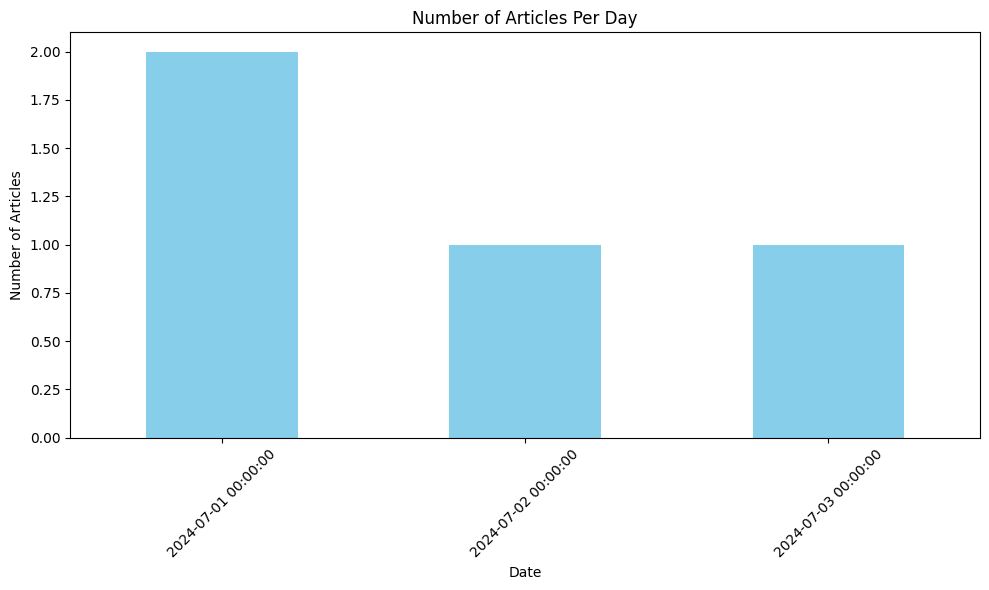

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Mock HTML content
html = '''
<html>
  <body>
    <div class="news-article">
      <h2 class="title">Breaking News: Market Crash</h2>
      <p class="summary">The stock market experienced a significant crash today.</p>
      <span class="date">2024-07-01</span>
      <span class="author">John Doe</span>
      <span class="category">Finance</span>
    </div>
    <div class="news-article">
      <h2 class="title">Sports Update: Local Team Wins</h2>
      <p class="summary">The local team won their championship game last night.</p>
      <span class="date">2024-07-01</span>
      <span class="author">Jane Smith</span>
      <span class="category">Sports</span>
    </div>
    <div class="news-article">
      <h2 class="title">Weather Alert: Storm Incoming</h2>
      <p class="summary">A major storm is expected to hit the coast this weekend.</p>
      <span class="date">2024-07-02</span>
      <span class="author">John Doe</span>
      <span class="category">Weather</span>
    </div>
    <div class="news-article">
      <h2 class="title">Tech Innovation: New AI Breakthrough</h2>
      <p class="summary">A new AI technology promises to revolutionize the industry.</p>
      <span class="date">2024-07-03</span>
      <span class="author">Jane Smith</span>
      <span class="category">Technology</span>
    </div>
  </body>
</html>
'''

# Parsing the HTML content with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Finding all news articles
articles = soup.find_all('div', class_='news-article')

# Extracting data from each article
data = []
for article in articles:
    title = article.find('h2', class_='title').text
    summary = article.find('p', class_='summary').text
    date = article.find('span', class_='date').text
    author = article.find('span', class_='author').text
    category = article.find('span', class_='category').text
    data.append({'Title': title, 'Summary': summary, 'Date': date, 'Author': author, 'Category': category})

# Creating a DataFrame from the extracted data
df = pd.DataFrame(data)

# Converting the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Analyzing the data
articles_per_day = df['Date'].value_counts().sort_index()
most_common_author = df['Author'].mode()[0]
most_common_category = df['Category'].mode()[0]

# Printing the analysis results
print(df)
print(f"articles per day:{articles_per_day}")
print(f"Most Common Author: {most_common_author}")
print(f"Most Common Category: {most_common_category}")

# Visualizing the number of articles per day
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
import urllib.request
from bs4 import BeautifulSoup
import json
import pandas as pd

# Fetch the webpage
url = "https://www.bbc.com/news"
response = urllib.request.urlopen(url)
webContent = response.read()

# Parse the webpage content
soup = BeautifulSoup(webContent, 'html.parser')

# Extract all <h2> headers and find their parent <a> tags
headers = soup.find_all('h2')
titles = []
links = []

for header in headers:
    parent_a_tag = header.find_parent('a', href=True)
    if parent_a_tag:
        full_url = "https://www.bbc.com" + parent_a_tag['href']
        titles.append(header.get_text())
        links.append(full_url)

# Print the lists of titles and links formatted as JSON
header_links = dict(zip(titles, links))
print(json.dumps(header_links, indent=4))

# Create a DataFrame from the lists
df = pd.DataFrame({
    'Title': titles,
    'Link': links
})

# Display the DataFrame
print(df)


{
    "Countries urge nationals to leave Lebanon as Mid-East war fears grow": "https://www.bbc.com/news/articles/c80xxeqel5po",
    "'They're tightening the screws': Kremlin ups attacks on critics abroad": "https://www.bbc.com/news/articles/cl4y0j47xe4o",
    "Winds lift bouncy castle into the air killing five-year-old": "https://www.bbc.com/news/articles/cx0229gkn3po",
    "World's biggest iceberg is spinning, caught in an ocean trap": "https://www.bbc.com/news/articles/cd168081wxvo",
    "North Korea performs diplomatic gymnastics in Olympic comeback": "https://www.bbc.com/news/articles/crgkk0rle75o",
    "Trump and Harris at odds over presidential debate": "https://www.bbc.com/news/articles/cv2g22365yqo",
    "Police called to save cat with jar stuck on head": "https://www.bbc.com/news/videos/cydvv6qv2n4o",
    "Ukraine says it sank Russian submarine in Crimea": "https://www.bbc.com/news/articles/c4nggvg1yggo",
    "More than 90 arrests in UK after far-right demonstrations turn viol